In [1]:
from tensorflow import keras
from keras.models import load_model
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [2]:
sns.set_theme()

# 01. Conhecendo o conjunto de dados

In [3]:
# Carrega o dataset dos exemplos do keras
dataset = keras.datasets.fashion_mnist.load_data()

Formato do dataset de treino: (60000, 28, 28).
Formato do dataset de teste: (10000, 28, 28).


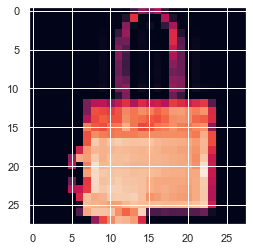

In [4]:
# Descompactação de tuplas
(x_treino, y_treino), (x_teste, y_teste) = dataset
print(f'Formato do dataset de treino: {x_treino.shape}.')
print(f'Formato do dataset de teste: {x_teste.shape}.')
# Visualizando uma das imagens
plt.imshow(x_treino[333])
plt.show()

# 02. Começando a montar o modelo

In [5]:
# Número diferente de valores em Y
total_de_classificacoes = len(np.unique(y_treino))
# Nomes para cada número em Y (de https://github.com/zalandoresearch/fashion-mnist#labels)
nomes_das_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

In [6]:
# Instanciando o modelo com a classe Sequential
modelo = keras.Sequential()
# Inserção da camada de entrada (camada achatada de 28x28 --> 784)
modelo.add(
    keras.layers.Flatten(input_shape=(x_treino.shape[1], x_treino.shape[2]))
)
# Camada que performa o dropout (ver comentário após os gráficos da seção 6)
modelo.add(
    keras.layers.Dropout(rate=0.2)
)

# 03. Adicionando camadas ocultas

In [7]:
# Adicionando a primeira hidden layer
modelo.add(
    keras.layers.Dense(units=256, activation=tf.nn.relu)
)
# Adicionando a camada de saída, 'units' deve ser igual à quantidade de saídas únicas
modelo.add(
    keras.layers.Dense(total_de_classificacoes, activation=tf.nn.softmax)
)

In [8]:
# Outra forma de declarar o modelo direto é: (aqui, achei melhor comentar todas camadas e conhecer as duas)
modelo_v2 = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(x_treino.shape[1], x_treino.shape[2])),
        keras.layers.Dropout(rate=0.2),
        keras.layers.Dense(units=256, activation=tf.nn.relu),
        keras.layers.Dense(total_de_classificacoes, activation=tf.nn.softmax)
    ]
)

# 04. Ensinando o modelo

In [9]:
# Normalizando as entradas
x_treino_norm = (x_treino/255).astype(float)
x_teste_norm = (x_teste/255).astype(float)

In [10]:
# Compilando o modelo
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Ajustando o modelo
historico = modelo.fit(x_treino_norm, y_treino, epochs=4, validation_split=0.20)

Epoch 1/4
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5436 - accuracy: 0.8056 - val_loss: 0.4525 - val_accuracy: 0.8356
Epoch 2/4
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4162 - accuracy: 0.8483 - val_loss: 0.3692 - val_accuracy: 0.8652
Epoch 3/4
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3790 - accuracy: 0.8608 - val_loss: 0.3456 - val_accuracy: 0.8751
Epoch 4/4
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3540 - accuracy: 0.8674 - val_loss: 0.3539 - val_accuracy: 0.8686


# 05. Sabendo como medir o resultado do modelo

In [11]:
# Para uma predição
pred = modelo.predict(x_teste_norm)
# Calculando taxa de acerto
num_de_acertos = sum(np.argmax(pred, axis=1) == y_teste)
print(f'Taxa de acerto obtida no conjunto de teste: {round(num_de_acertos*100/len(y_teste), 2)}%.')

313/313 [==============================] - 1s 2ms/step
Taxa de acerto obtida no conjunto de teste: 86.14%.


In [12]:
# Ou, usar a função evaluate
perda_teste, acuracia_teste = modelo.evaluate(x_teste_norm, y_teste, verbose=0)
print(f'Perda no conjunto de teste: {round(perda_teste, 4)}.')
print(f'Acurácia no conjunto de teste: {round(acuracia_teste*100, 2)}%.')

Perda no conjunto de teste: 0.3748.
Acurácia no conjunto de teste: 86.14%.


# 06. Ajustando e salvando o modelo

Para checar como o modelo está performando, serão feitos dois gráficos: acurácia e perda por épocas, ambos comparando o conjunto de treino e validação.

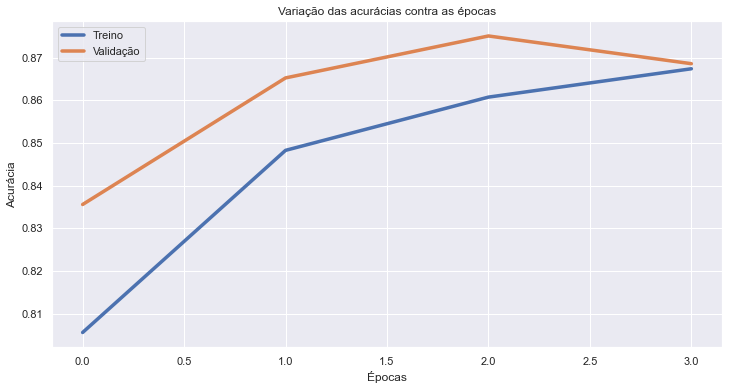

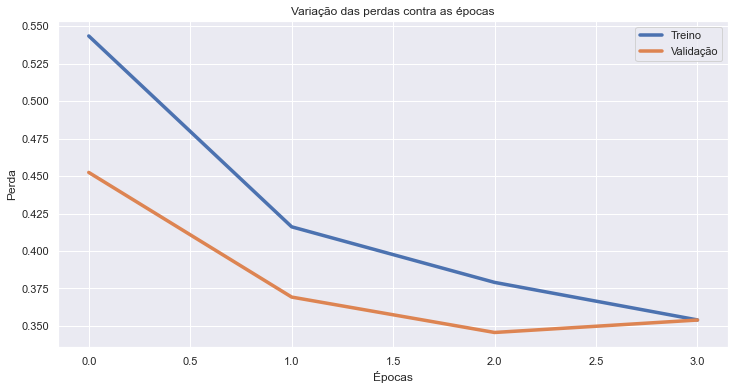

In [13]:
# Acurácia por épocas
plt.figure(figsize=(12,6))
plt.plot(historico.history['accuracy'], linewidth=3.5)
plt.plot(historico.history['val_accuracy'], linewidth=3.5)
plt.title('Variação das acurácias contra as épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])
plt.show()

# Perda por épocas
plt.figure(figsize=(12,6))
plt.plot(historico.history['loss'], linewidth=3.5)
plt.plot(historico.history['val_loss'], linewidth=3.5)
plt.title('Variação das perdas contra as épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend(['Treino', 'Validação'])
plt.show()

Com os resultados vistos, foi sugerida a implementação da técnica de regularização (aqui, prevenir sobreajuste) 'dropout', inserida como uma camada do modelo no keras; funciona de forma a transformar alguns inputs em 0 de uma maneira aleatória, com uma taxa especificada pelo parâmetro 'rate' da função.

In [14]:
# Salvando o modelo:
modelo.save('modelo_epochs5_nodes5.h5')

# Carregando o modelo:
modelo_salvo = load_model('modelo_epochs5_nodes5.h5')

In [15]:
modelo.summary()
print('\n')
modelo_salvo.summary()
# Save -> Load funcionando!

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)          